# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Importing the dataset

In [ ]:
dataset = pd.read_csv('SampleSuperstore.csv')


# Basic Data Exploration
In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

– head of the dataset
– the shape of the dataset
– info of the dataset
– summary of the dataset

The head function will tell you the top records in the data set. By default, python shows you only the top 5 records.
The shape attribute tells us a number of observations and variables we have in the data set. It is used to check the dimension of data. The cars data set has 303 observations and 13 variables in the data s

In [ ]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
dataset.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
dataset.shape

(9994, 13)

info() is used to check the Information about the data and the datatypes of each respective attribute.



In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values, and maximum values.



In [ ]:
dataset.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#Handling missing data

In [ ]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#Handling duplicate records

In [ ]:
duplicate=dataset.duplicated()
print(duplicate.sum())
dataset[duplicate]

17


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


Since we have 17 duplicate records in the data, we will remove this from the data set so that we get only distinct records. Post removing the duplicate, we will check whether the duplicates have been removed from the data set or not.


In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dpl=dataset.duplicated()
dpl.sum()

0

Handling Outlier
Outliers, being the most extreme observations, may include the sample maximum or sample minimum, or both, depending on whether they are extremely high or low. However, the sample maximum and minimum are not always outliers because they may not be unusually far from other observations.

We Generally identify outliers with the help of boxplot, so here box plot shows some of the data points outside the range of the data.


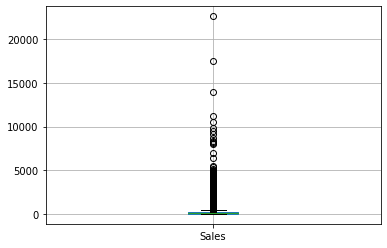

In [ ]:
dataset.boxplot(column=["Sales"])
plt.show()

Looking at the box plot, it seems that the variables Sales, have outlier present in the variables. These outliers value needs to be teated and there are several ways of treating them:

Drop the outlier value
Replace the outlier value using the IQR


In [ ]:
def remove_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  IQR=q3-q1
  lower_range=q1-(1.5*IQR)
  upper_range=q3+(1.5*IQR)
  return lower_range, upper_range

In [ ]:
lowsales,upsales=remove_outlier(dataset['Sales'])
dataset['Sales']=np.where(dataset['Sales']>upsales,upsales,dataset['Sales'])
dataset['Sales']=np.where(dataset['Sales']<lowsales,lowsales,dataset['Sales'])

<function matplotlib.pyplot.show>

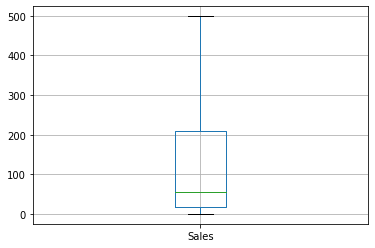

In [ ]:
dataset.boxplot(column=["Sales"])
plt.show

#repeating the same for profit

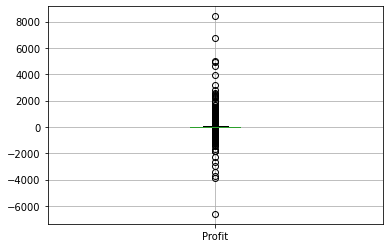

In [ ]:
dataset.boxplot(column=["Profit"])
plt.show()

Looking at the box plot, it seems that the variables Profit, have outlier present in the variables. These outliers value needs to be teated and there are several ways of treating them:

Drop the outlier value Replace the outlier value using the IQR

In [ ]:
lowprofit,upprofit=remove_outlier(dataset['Profit'])
dataset['Profit']=np.where(dataset['Profit']>upprofit,upprofit,dataset['Profit'])
dataset['Profit']=np.where(dataset['Profit']<lowprofit,lowprofit,dataset['Profit'])

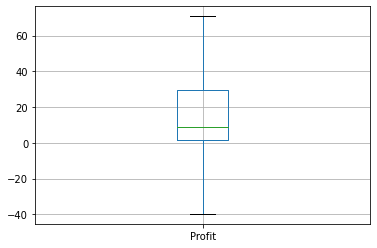

In [ ]:
dataset.boxplot(column=["Profit"])
plt.show()

Bivariate Analysis
When we talk about bivariate analysis, it means analyzing 2 variables. Since we know there are numerical and categorical variables, there is a way of analyzing these variables as shown below:

Numerical vs. Numerical
1. Scatterplot
2. Line plot
3. Heatmap for correlation
4. Joint plot

Categorical vs. Numerical
1. Bar chart
2. Violin plot
3. Categorical box plot
4.Swarm plot

Two Categorical Variables
1. Bar chart
2. Grouped bar chart
3. Point plot

If we need to find the correlation-

In [ ]:
dataset.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.007776,0.013110,0.059225,-0.031517
Sales,-0.007776,1.000000,0.265077,-0.060828,0.450235
Quantity,0.013110,0.265077,1.000000,0.008678,0.196670
Discount,0.059225,-0.060828,0.008678,1.000000,-0.497723
Profit,-0.031517,0.450235,0.196670,-0.497723,1.000000


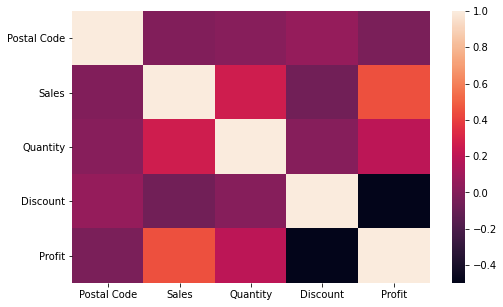

In [ ]:
fig, axes = plt.subplots(1,1, figsize = (8,5))
sns.heatmap(dataset.corr())
plt.show()

# COMMENTS

Here we can see discount and profit are highly negatively corelated
Values closer to zero means there is no linear trend between the two variables.
The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and
the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar,
but instead of both increasing one variable will decrease as the other increases

1) Here we can see discount and profit are highly negatively corelated

2)Sales and Profits are Moderately Correlated

3) Quantity and Profit are Moderately Correlated 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 720x720 with 0 Axes>

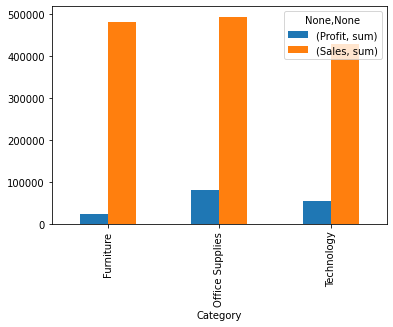

In [ ]:
plt.figure(figsize=(10,10))
dataset.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

# COMMENTS
Here, in the category Technology, both sales and profit are high when compared to the other ones.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 720x720 with 0 Axes>

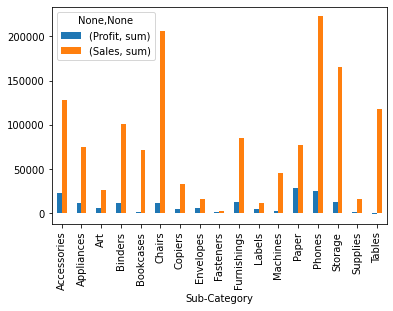

In [ ]:
plt.figure(figsize=(10,10))
dataset.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

# COMMENTS
In the Subcategory Column, PAPER has maximum amount of profit with cmparatively lesser sales. 
Whereas, tables experiences no profit at all with the sales around 2 lakh.

<Figure size 1728x720 with 0 Axes>

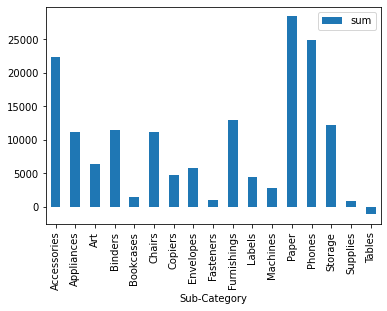

In [ ]:
plt.figure(figsize=(24,10))
dataset.groupby('Sub-Category')['Profit'].agg(['sum']).plot.bar()
plt.show()

# COMMENTS
IN the above sub-category section, with respect to profit:
1) Tablets are expereincing loss

2)Supplies produces the least amout of profit

3) PAPER produces maximum profit

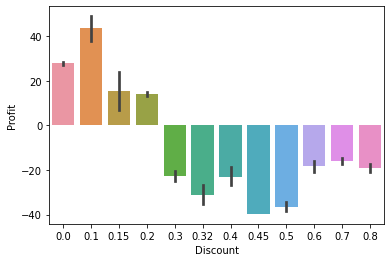

In [ ]:
sns.barplot(x=dataset.Discount,y=dataset.Profit)


# COMMENTS
When we compare the profit with respect to discounts, all the discounts above 20% is facing a major loss

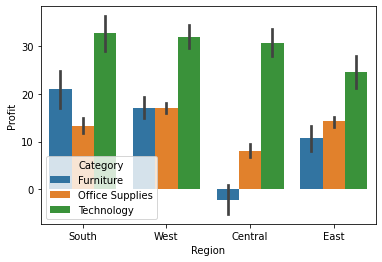

In [ ]:
sns.barplot(x=dataset.Region, y=dataset.Profit,hue=dataset.Category)

# COMMENTS
When we perform a bivariate analsyis of region and category with respect to profit, we can conclude from the above graph that:

1)Furniture is facing loss in the Central region

2)Technology gets maximum profit in the Southern region.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


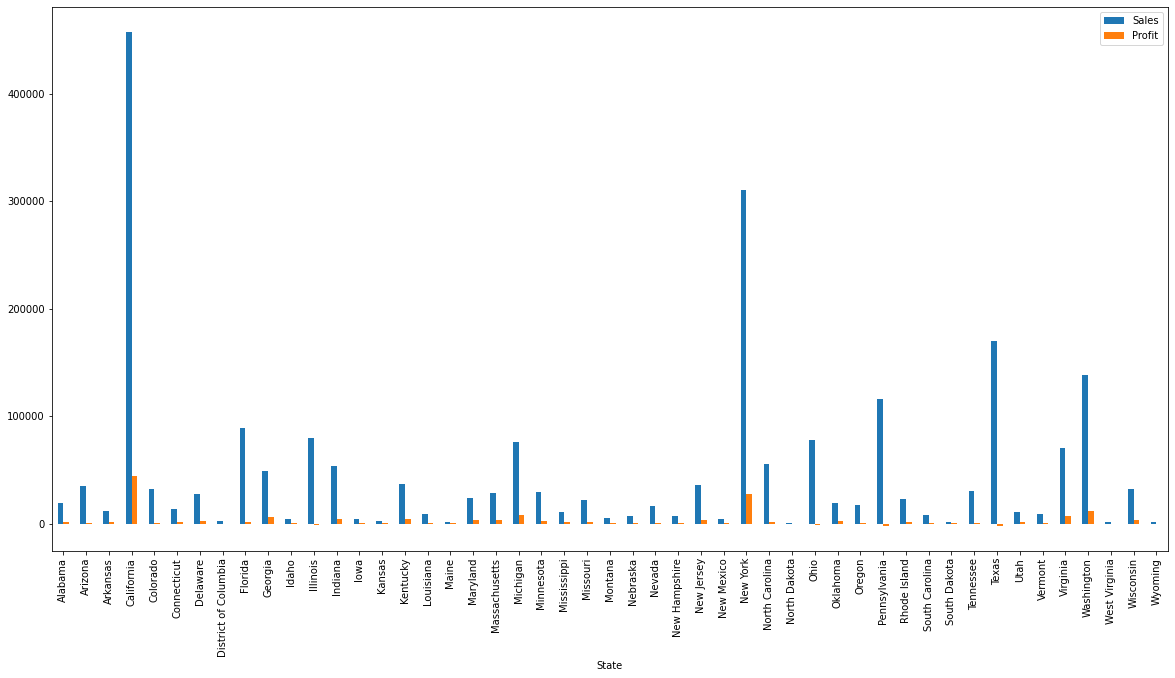

In [ ]:
dataplot = dataset.groupby(['State'])['Sales', 'Profit'].sum()
dataplot.plot.bar(figsize = (20,10))

# COMMENTS
When the data of different states is analysed, we can conclude that California recieves maximum amount of profit with maximum sales when compared to the other states

#Univariate Analysis

In [ ]:
dataset['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [ ]:
(dataset['Ship Mode'].value_counts()/len(dataset['Ship Mode']))*100

Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: Ship Mode, dtype: float64

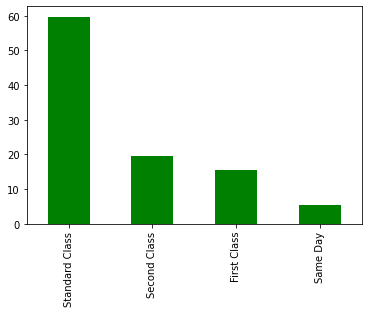

In [ ]:
((dataset['Ship Mode'].value_counts()/len(dataset['Ship Mode']))*100).plot(kind="bar", color="green")


# COMMENTS
Conclusions when the ship mode data is analysed:

1) Maximum number of shipments belong to tha standard class

2) whereas, very less number of shipments are done on the same day (, 10%)

In [ ]:
dataset['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [ ]:
(dataset['Category'].value_counts()/len(dataset['Category']))*100

Office Supplies    60.296178
Furniture          21.222734
Technology         18.481089
Name: Category, dtype: float64

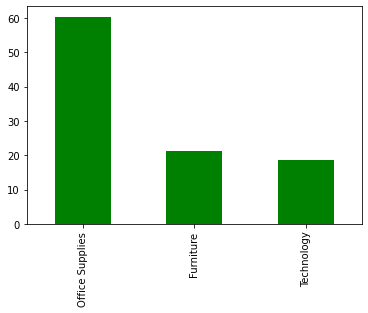

In [ ]:
((dataset['Category'].value_counts()/len(dataset['Category']))*100).plot(kind="bar", color="green")

# COMMENTS
In the Category Section:

1) Almost 60% of products belong to Office supplies

2) Almost 18% of product belong to Technology which is the  minimum